## 🔍 Revisiting and Understanding Angular Resolution  

We are almost ready to create our **first radar image**, but before that, let’s explore an important concept: **angular resolution**.  

In our previous experiment, we saw that placing the targets **too close together** in azimuth angle made them mushed together—we could not separate them in the beamforming output.  

We have previously examined how **antenna size** affects the shape and width of our **antenna beam**. 🔦 Now that we understand **how received waves combine across multiple elements**, let's take a fresh look.  

### **🔑 Key Principles to Remember**  

- The **angle of the wavefront** causes **phase differences** across the antenna elements. Our buoys move up and down but at different phases.  
- The **beam width** depends on **how many elements** contribute to the combined wave.  
  *(If you need a refresher, revisit the Lesson 2 notebooks to see how waves from mulple sources combine to form a beam.)*  

We are **summing waves** from different antenna elements, just like we did when we examined the transmitted beam pattern. Thus, the **receiving beam pattern** is **identical** to the **transmit beam pattern**. You might have already noticed this in the beamforming animation in the previous notebook! 💡

### **🔬 How Close Can We Resolve Two Targets?**  

The **critical factor** is their **angular separation**, since the radar array can only sense **phase differences** between elements, which directly depend on the **wavefront angle**. If two wavefronts come from the **same angle**, there's no way to tell the difference between the waves by comparing the phase shifts between the elements. 


### 🛠 **Experiment: Adjusting Array Size & Target Distance**  

Use the **code snippet below** to investigate **how the array size affects angular resolution**:  

✅ **Place two targets** at different positions in front of the array.  

✅ **Observe how the beamforming response changes** when the targets are closer together.

✅ **Change the antenna size** to see how the combined response and resolution changes.

✅ **Try increasing the distance** (y-coordinate) while keeping the **x-coordinates fixed**.  
🔹 How does **distance from the radar** affect **resolving power**?  
🔹 How close can two targets be before they merge into one?  

Run the experiment and **discover the limits** of our resolution!

Target 1 arrival angle: 3.58 degrees
Target 2 arrival angle: -3.58 degrees


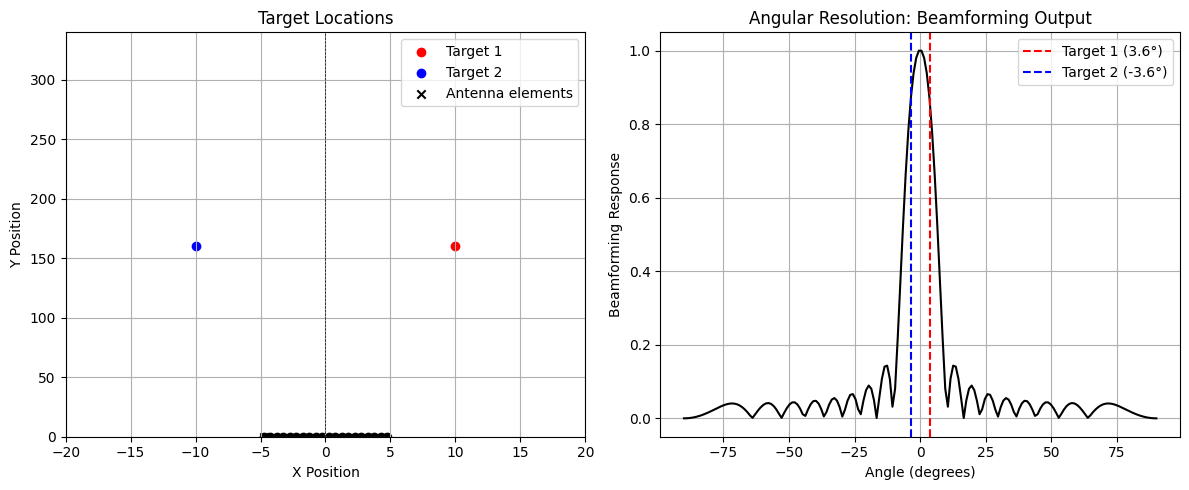

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# User input: Size of the antenna in meters
antenna_width = 10.0 # m

# Define wavelength and wave number
wavelength = 1.0 # m
k = 2 * np.pi / wavelength # 1/m
d = wavelength / 2  # Element spacing
N_elements = int(np.ceil(antenna_width / d)) # Number of elements

# User input: Target positions in (x, y) coordinates
target1_x, target1_y = 10,160
target2_x, target2_y = -10,160
target_amplitude1 = 1.0
target_amplitude2 = 1.0

max_x = np.max([abs(target1_x), abs(target2_x)]) + 10
max_y = np.max([abs(target1_y), abs(target2_y)]) + 10

# Compute the arrival angles for both targets
angle1_rad = np.arctan2(target1_x, target1_y)
angle2_rad = np.arctan2(target2_x, target2_y)

angle1_deg = np.degrees(angle1_rad)
angle2_deg = np.degrees(angle2_rad)

print(f"Target 1 arrival angle: {angle1_deg:.2f} degrees")
print(f"Target 2 arrival angle: {angle2_deg:.2f} degrees")

# Compute element positions
positions = np.linspace(-(N_elements-1)/2 * d, (N_elements-1)/2 * d, N_elements)

# Compute received signals for each element
received_phasors_target1 = target_amplitude1 * np.exp(1j * k * positions * np.sin(angle1_rad))
received_phasors_target2 = target_amplitude2 * np.exp(1j * k * positions * np.sin(angle2_rad))

# Total received signal (superposition of both targets)
received_phasors = received_phasors_target1 + received_phasors_target2

# Define angular scan range
angle_min_deg = -90
angle_max_deg = 90
num_angles = 180
beam_angle_vector = np.linspace(np.radians(angle_min_deg), np.radians(angle_max_deg), num_angles)

# Perform beamforming scan
beam_output = np.zeros(num_angles)

for i, beam_angle in enumerate(beam_angle_vector):
    beam_weights = np.exp(-1j * k * positions * np.sin(beam_angle))
    beam_output[i] = np.abs(np.sum(received_phasors * beam_weights))

# Normalize beam output
beam_output /= np.max(beam_output)

# Plot results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 1. Plot the target positions
ax_grid = axes[0]
ax_grid.scatter(target1_x, target1_y, color='r', label="Target 1")
ax_grid.scatter(target2_x, target2_y, color='b', label="Target 2")
ax_grid.scatter(positions[0], 0, color='k', marker='x', label=f"Antenna elements")
for i, pos in enumerate(positions):
    ax_grid.scatter(pos, 0, color='k')

ax_grid.axhline(0, color='k', linestyle='--', linewidth=0.5)
ax_grid.axvline(0, color='k', linestyle='--', linewidth=0.5)
ax_grid.set_xlim(-max_x, max_x)
ax_grid.set_ylim(0, 2*max_y)
ax_grid.set_xlabel("X Position")
ax_grid.set_ylabel("Y Position")
ax_grid.set_title("Target Locations")
ax_grid.legend()
ax_grid.grid(True)

# 2. Plot beamforming response
ax_beam = axes[1]
ax_beam.plot(np.degrees(beam_angle_vector), beam_output, 'k-')
ax_beam.axvline(angle1_deg, color='r', linestyle='--', label=f"Target 1 ({angle1_deg:.1f}°)")
ax_beam.axvline(angle2_deg, color='b', linestyle='--', label=f"Target 2 ({angle2_deg:.1f}°)")
ax_beam.set_xlabel("Angle (degrees)")
ax_beam.set_ylabel("Beamforming Response")
ax_beam.set_title("Angular Resolution: Beamforming Output")
ax_beam.legend()
ax_beam.grid(True)

plt.tight_layout()
plt.show()

## 🎯 Understanding Azimuth Angle and Cross-Range Resolution  

### 📡 Mainlobe Width and the Sinc Pattern  

The **mainlobe width** of our beam is roughly equal to the **wavelength divided by the antenna diameter**.

Mathematically, the beam pattern follows what is known as a **sinc function**: $\text{sinc}(x) = \sin(x)/x$.

This function describes the shape of the beam, with the **mainlobe** at the center and **sidelobes** diminishing in amplitude as you move outward. 📶

If two targets are **closer together** than **half the width** of the **mainlobe**, their waves become so closely **merged** that we can no longer distinguish them. In the **angular map**, their responses blur together, making them **indistinguishable**.  🌫️

### 🔍 **How Distance Affects Resolution**  

💡 By changing the target distance from the radar, you may have noticed an important fact:

📌 Since the **array resolves incoming waves by azimuth angle**, the **resolution in the horizontal x-axis direction** depends on the **distance to the target**.  

- **For targets closer to the radar**, we achieve **better horizontal resolution**.  
- **For targets further away**, we have **poorer horizontal resolution**.  

### **📡 Why Does This Happen?**  

- When targets are **close to the radar**, even a **small horizontal separation** creates a **clear azimuth angle difference** for the incoming wavefronts.  
- When targets are **far away**, the **same horizontal separation** produces a **much smaller difference in their azimuth angle**, making them harder to distinguish.  

### **📏 Cross-Range Resolution & Distance**  

The **horizontal direction**, which runs along the **radar array** (x-axis in our plots), is also known as **cross-range** in radar terminology. 📡📏  

📌 We have just discovered an important principle:  

**The cross-range resolution of a real aperture radar depends on the target's distance from the radar!**  

This means that **closer targets can be resolved with finer detail**, while **farther targets appear more blurred in the cross-range dimension**. 📡  

--- 

📌 You can use the snippet below to **visualize** how the same **horizontal difference** between targets results in very **different azimuth angles**, depending on their **distance from the radar**. 📡🔍  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define radar and target positions
radar_pos = (0, 0) # Radar is at the origin
close_targets = [(2, 6), (6, 6)]  # Closer targets with clear horizontal separation
far_targets = [(2, 25), (6, 25)]  # Farther targets with same horizontal separation

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot radar position
ax.scatter(*radar_pos, color='black', marker='x', s=100, label="Radar")

# Plot close targets
for target in close_targets:
    ax.scatter(*target, color='red', s=100, label="Close Targets" if target == close_targets[0] else "")

# Plot far targets
for target in far_targets:
    ax.scatter(*target, color='blue', s=100, label="Far Targets" if target == far_targets[0] else "")

# Function to draw dashed wavefront lines
def draw_wavefronts(source, radar, color):
    x_source, y_source = source
    angle = np.arctan2(y_source - radar[1], x_source - radar[0])  # Compute angle
    x_wave = np.linspace(radar[0], x_source, 100)
    y_wave = np.tan(angle) * (x_wave - radar[0]) + radar[1]
    ax.plot(x_wave, y_wave, linestyle="dashed", color=color, alpha=0.7)

# Function to draw perpendicular wavefront lines
def draw_perpendicular_lines(source, radar, color):
    x_source, y_source = source
    angle = np.arctan2(y_source - radar[1], x_source - radar[0])  # Compute angle
    # Define perpendicular angle
    perp_angle = angle + np.pi / 2  
    length = 3  # Length of perpendicular wavefront line

    # Compute endpoints of perpendicular wavefront line
    x_perp1 = x_source + length * np.cos(perp_angle)
    y_perp1 = y_source + length * np.sin(perp_angle)
    x_perp2 = x_source - length * np.cos(perp_angle)
    y_perp2 = y_source - length * np.sin(perp_angle)

    # Draw the perpendicular wavefront line
    ax.plot([x_perp1, x_perp2], [y_perp1, y_perp2], color=color, linewidth=1.5)

# Draw wavefront lines and perpendicular wavefronts for close targets
for target in close_targets:
    draw_wavefronts(target, radar_pos, 'red')
    draw_perpendicular_lines(target, radar_pos, 'red')

# Draw wavefront lines and perpendicular wavefronts for far targets
for target in far_targets:
    draw_wavefronts(target, radar_pos, 'blue')
    draw_perpendicular_lines(target, radar_pos, 'blue')

# Labels and title
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_title("Same horizontal separation, different wavefronts and azimuth angles")
ax.legend()
ax.grid(True, linestyle="--", linewidth=0.5)

# Set limits
ax.set_xlim(-5, 15)
ax.set_ylim(0, 30)

# Show plot
plt.show()


### 🔗 Connecting Resolution to the Transmit Pattern  

Finally, let’s think about the **resolving** ability of our antenna in the context of the **transmit beam pattern** we explored in the last lesson. 🌊 

📡 As you may have noticed from the plots in the **previous lesson**, the **wavefront expands** as it propagates, covering an increasingly **wider horizontal area**.  

🔍 The principle is the same as with **distance-dependent cross-range resolution**—but now viewed from the **transmit perspective**. 

As the transmitted wavefront **spreads**, its **angular extent remains constant**, but the **footprint it illuminates in the horizontal direction increases with distance**. 👣  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the wave
wavelength = 10.0 # m
wave_frequency = 2 * np.pi / wavelength  # Spatial frequency of the wave
amplitude = 1.0  # Wave amplitude
grid_size = 200  # Grid resolution
space_extent = 10 * wavelength  # Spatial extent in x and y directions

# Create a meshgrid for the 2D space
x = np.linspace(-space_extent, space_extent, grid_size)
y = np.linspace(0, 2 * space_extent, grid_size)
X, Y = np.meshgrid(x, y)

# User input: Number of antenna elements
N = 8  # User selects number of elements
d = wavelength / 2  # Half-wavelength element spacing

# Compute the positions of the antenna elements
positions = np.linspace(-(N-1)/2 * d, (N-1)/2 * d, N)

Z_total = np.zeros_like(X)  # Initialize wave sum
# Compute contributions from each antenna element
for pos in positions:
    R = np.sqrt((X - pos)**2 + Y**2)  # Distance the wave has traveled from each element
    Z_total += amplitude * np.sin(wave_frequency * R) # Waves are added together

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 6))
extent = (-space_extent, space_extent, 2*space_extent, 0)
cax = ax.imshow(Z_total, extent=extent, cmap='jet', vmin=-N*amplitude, vmax=N*amplitude)
plt.colorbar(cax, ax=ax, label='Wave Height')
ax.set_title(f'Wave Interference from {N}-Element Buoy Array')
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')

# Plot buoys
ax.scatter(positions, np.zeros_like(positions), label="Buoy Locations", color="black", s=50, marker='o')
ax.legend()

plt.show()